### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/brset/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [4]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.head()

,DR_ICDR,DR_2,DR_3,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,0,0,0,train,0.012998,-0.012632,0.010281,0.016375,-0.040752,-0.018974,...,-0.054316,0.026362,0.062661,0.023066,-0.023967,-0.013421,0.033898,-0.058343,0.027308,0.011322
1,0,0,0,test,0.013524,-0.017406,0.012482,0.012262,-0.039934,-0.022396,...,-0.054454,0.018202,0.061717,0.022467,-0.011161,-0.011376,0.030134,-0.049021,0.021231,0.010651
2,0,0,0,train,0.036357,-0.018087,-0.001801,0.010425,-0.036854,-0.019405,...,-0.055949,0.011358,0.072995,0.030307,-0.011789,-0.011042,0.042255,-0.057926,0.033326,0.018503
3,0,0,0,train,0.022021,-0.011668,0.010509,0.022121,-0.035989,-0.023524,...,-0.055314,0.002594,0.074490,0.034430,-0.000350,-0.007918,0.042707,-0.047150,0.027270,0.020940
4,0,0,0,test,0.018684,-0.010326,0.004721,0.006435,-0.045767,-0.025992,...,-0.052848,0.021930,0.068045,0.027663,-0.020903,-0.012616,0.037164,-0.051632,0.033358,0.013019


## Data Perparation

In [5]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_2'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (13012, 1028)
Test Shape: (3254, 1028)


### Models

In [7]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131585


STAGE:2024-02-07 16:27:13 62562:62562 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9628
Epoch 1/15 - Training Time: 1.12 seconds | Inference Time: 0.21 seconds
Epoch 2/15 - Test Accuracy: 0.9634
Epoch 2/15 - Training Time: 1.32 seconds | Inference Time: 0.22 seconds
Epoch 3/15 - Test Accuracy: 0.9656
Epoch 3/15 - Training Time: 1.04 seconds | Inference Time: 0.26 seconds
Epoch 4/15 - Test Accuracy: 0.9677
Epoch 4/15 - Training Time: 0.86 seconds | Inference Time: 0.24 seconds
Epoch 5/15 - Test Accuracy: 0.9693
Epoch 5/15 - Training Time: 0.91 seconds | Inference Time: 0.24 seconds
Epoch 6/15 - Test Accuracy: 0.9680
Epoch 6/15 - Training Time: 0.89 seconds | Inference Time: 0.24 seconds
Epoch 7/15 - Test Accuracy: 0.9585
Epoch 7/15 - Training Time: 0.91 seconds | Inference Time: 0.25 seconds
Epoch 8/15 - Test Accuracy: 0.9647
Epoch 8/15 - Training Time: 0.98 seconds | Inference Time: 0.26 seconds
Epoch 9/15 - Test Accuracy: 0.9680
Epoch 9/15 - Training Time: 0.89 seconds | Inference Time: 0.27 seconds
Epoch 10/15 - Test Accuracy: 0.9699
E

STAGE:2024-02-07 16:27:34 62562:62562 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 16:27:34 62562:62562 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.85%        1.653s        54.69%        9.176s       2.999ms    -763.45 Mb    -769.64 Mb          3060  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        38.82%        6.514s        39.45%        6.619s       1.717ms     952.53 Mb     951.04 Mb          3855  
                              Optimizer.step#AdamW.step         6.84%        1.148s        23.91%        4.012s       1.311ms       1.00 Mb      -2.97

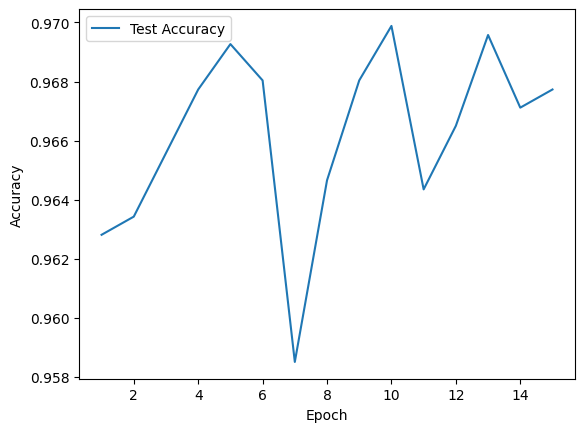

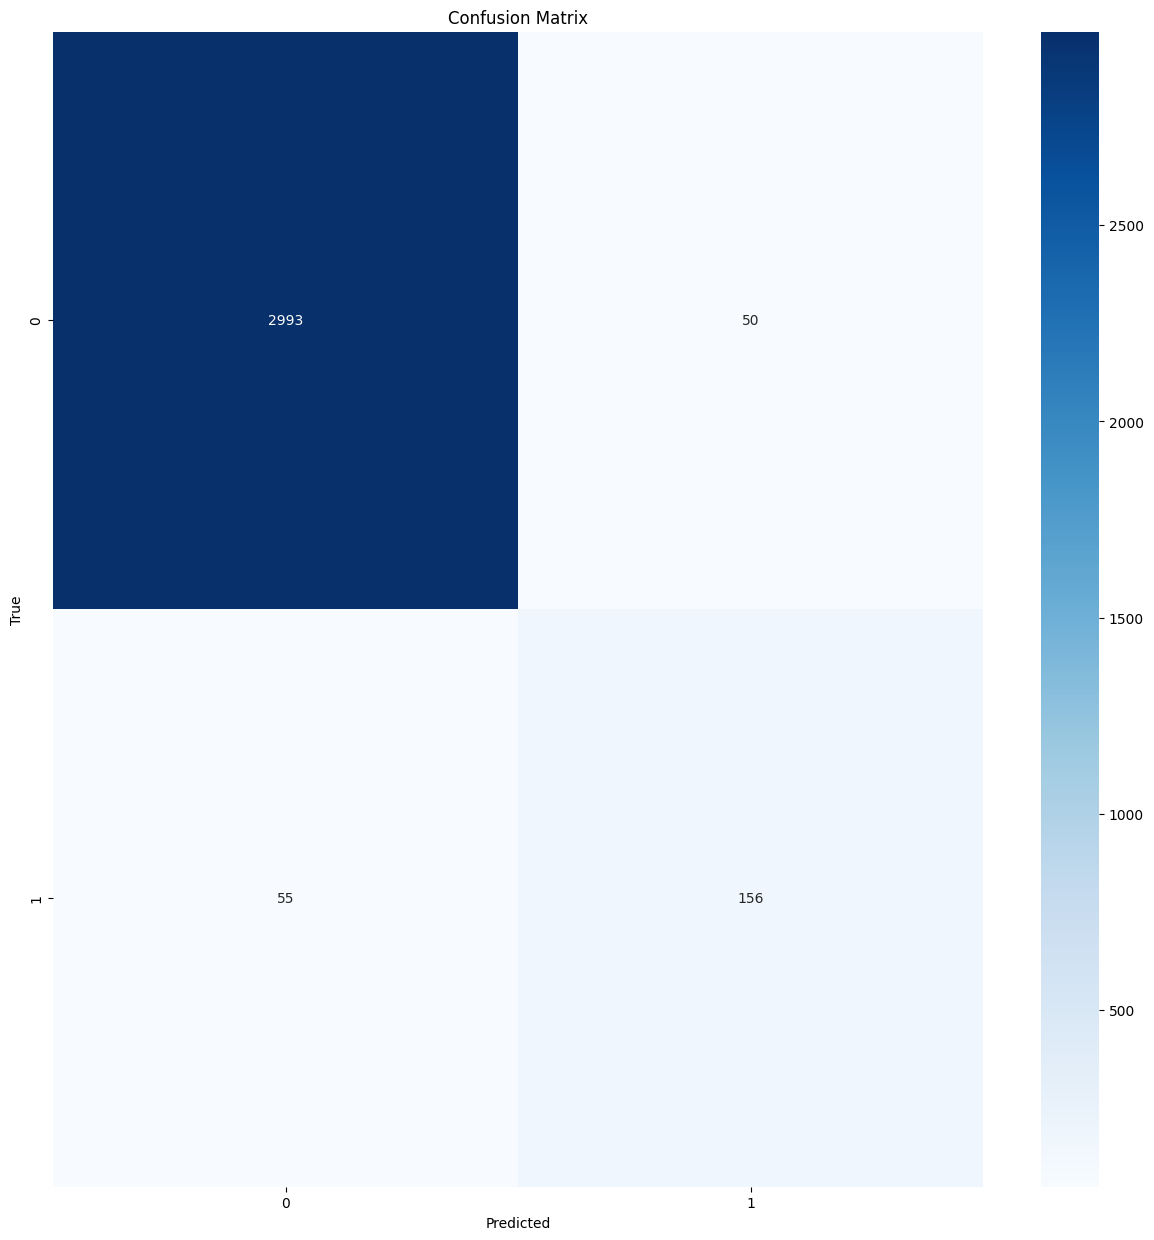

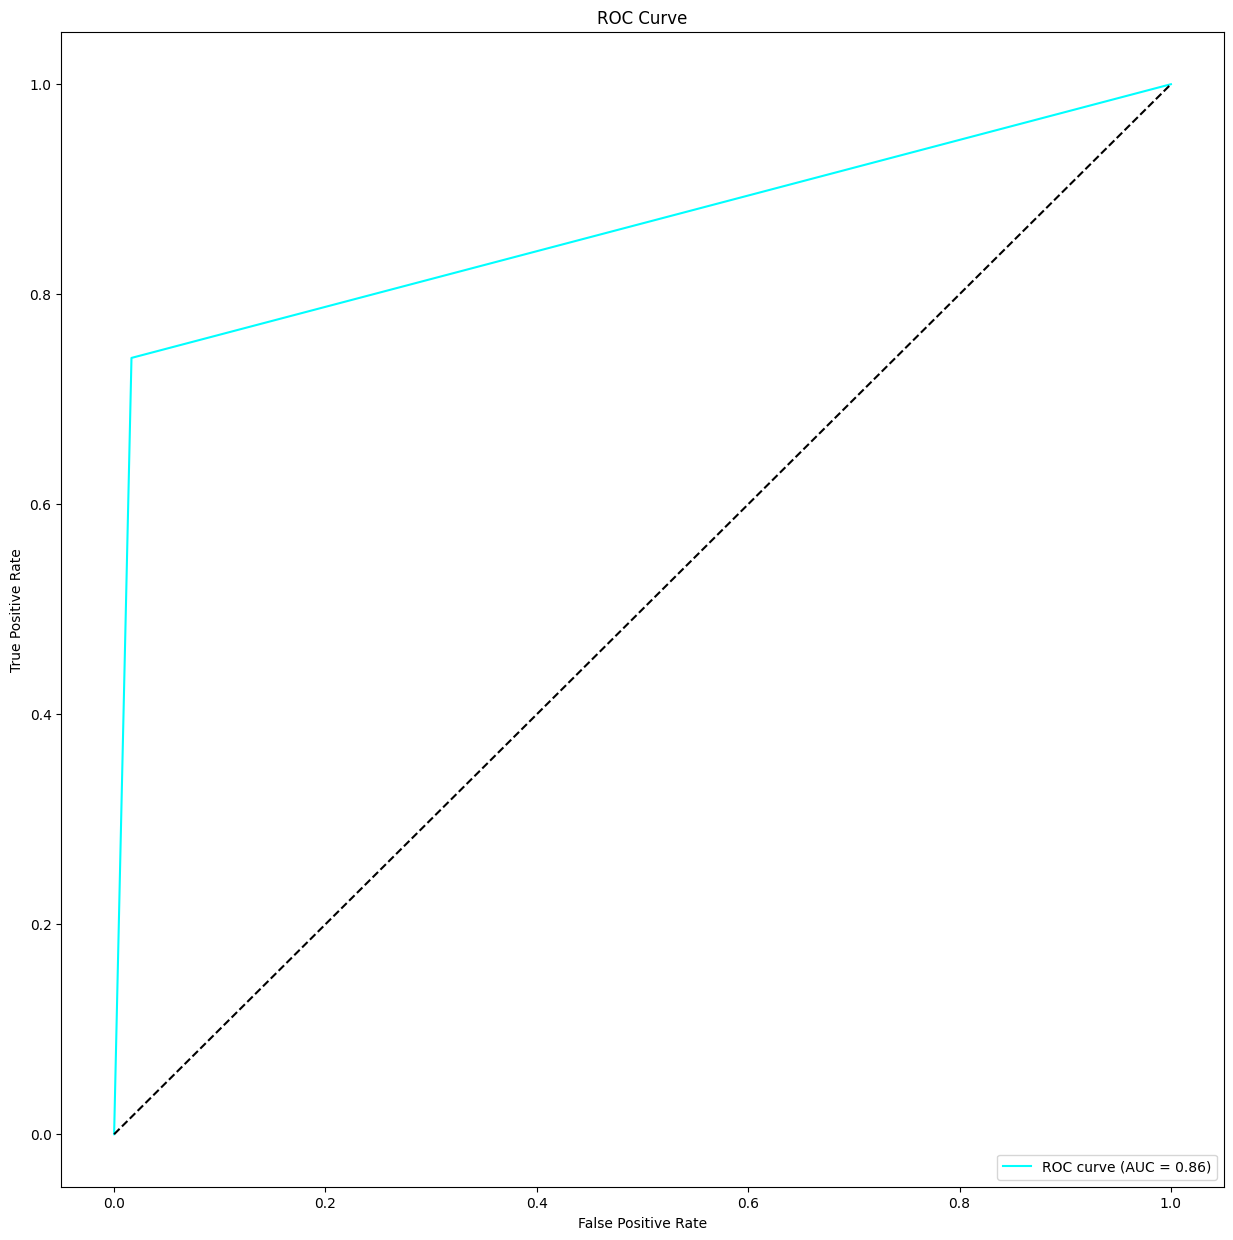

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3043
         1.0       0.76      0.74      0.75       211

    accuracy                           0.97      3254
   macro avg       0.87      0.86      0.87      3254
weighted avg       0.97      0.97      0.97      3254



In [8]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66049


STAGE:2024-02-07 16:29:38 62562:62562 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.9505
Epoch 1/15 - Training Time: 1.54 seconds | Inference Time: 0.42 seconds
Epoch 2/15 - Test Accuracy: 0.9155
Epoch 2/15 - Training Time: 1.64 seconds | Inference Time: 0.42 seconds
Epoch 3/15 - Test Accuracy: 0.9674
Epoch 3/15 - Training Time: 1.64 seconds | Inference Time: 0.41 seconds
Epoch 4/15 - Test Accuracy: 0.9687
Epoch 4/15 - Training Time: 1.40 seconds | Inference Time: 0.41 seconds
Epoch 5/15 - Test Accuracy: 0.9687
Epoch 5/15 - Training Time: 1.60 seconds | Inference Time: 0.42 seconds
Epoch 6/15 - Test Accuracy: 0.9644
Epoch 6/15 - Training Time: 1.48 seconds | Inference Time: 0.42 seconds
Epoch 7/15 - Test Accuracy: 0.9708
Epoch 7/15 - Training Time: 1.52 seconds | Inference Time: 0.40 seconds
Epoch 8/15 - Test Accuracy: 0.9699
Epoch 8/15 - Training Time: 1.58 seconds | Inference Time: 0.42 seconds
Epoch 9/15 - Test Accuracy: 0.9690
Epoch 9/15 - Training Time: 1.55 seconds | Inference Time: 0.41 seconds
Epoch 10/15 - Test Accuracy: 0.9668
E

STAGE:2024-02-07 16:30:12 62562:62562 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 16:30:12 62562:62562 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.91%        2.109s        66.57%       15.752s       4.118ms    -952.68 Mb    -956.19 Mb          3825  
                              Optimizer.step#AdamW.step         6.65%        1.574s        33.42%        7.906s       2.584ms     516.05 Kb      -1.47 Gb          3060  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        32.95%        7.795s        33.40%        7.902s       2.050ms     952.53 Mb     951.04

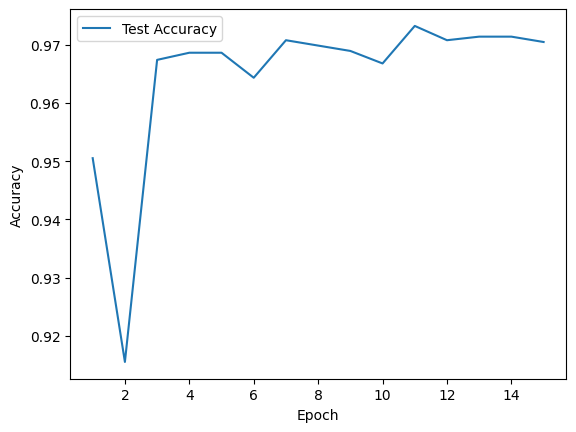

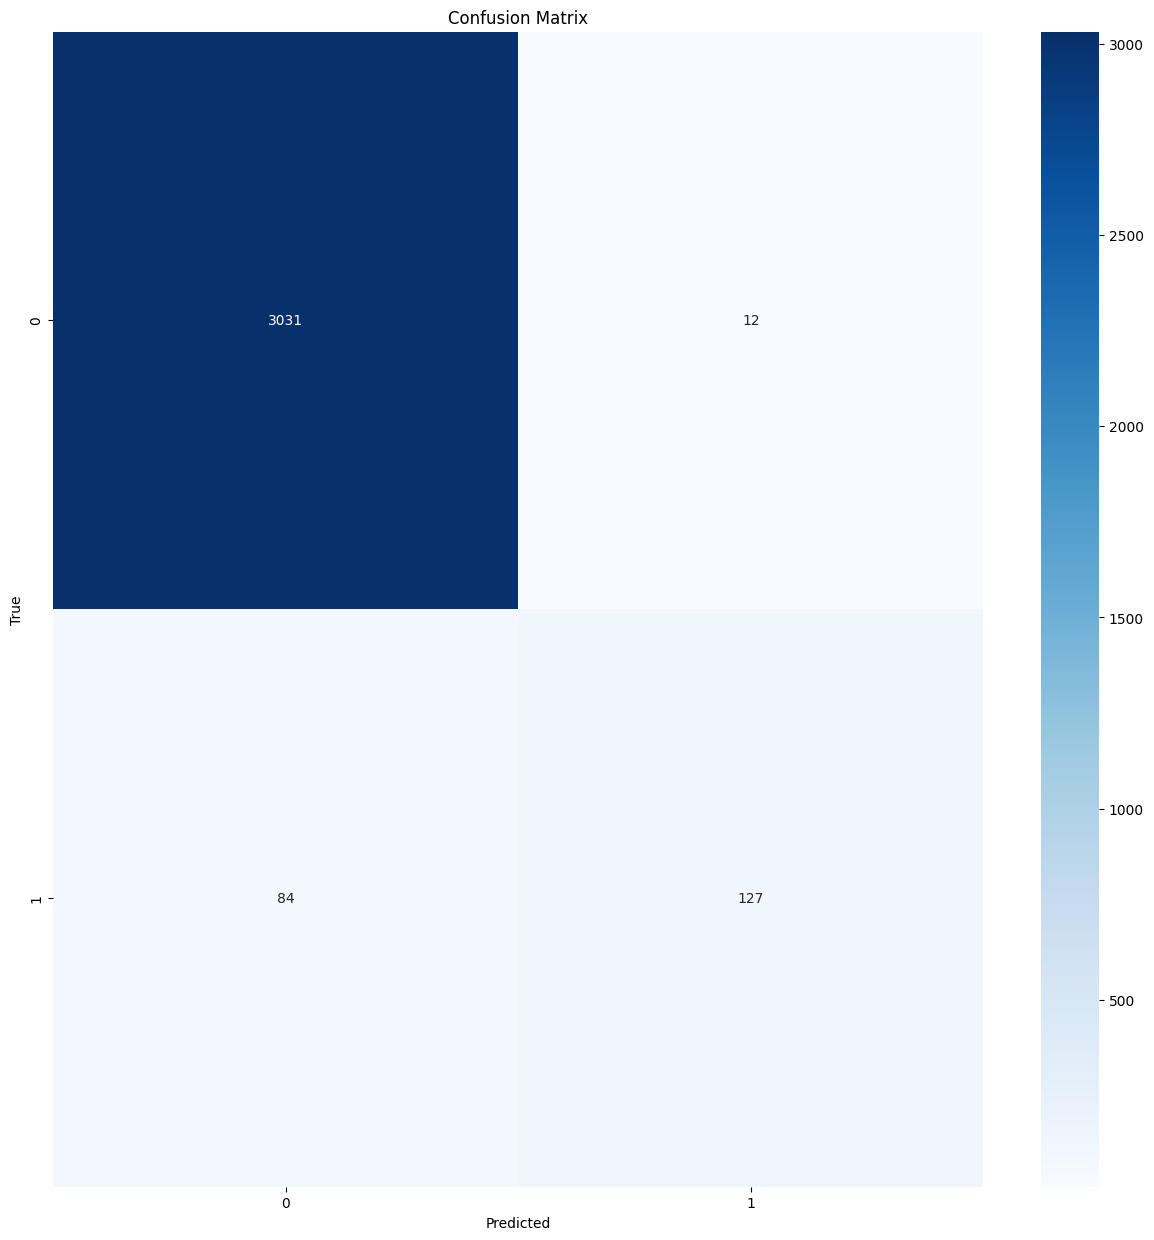

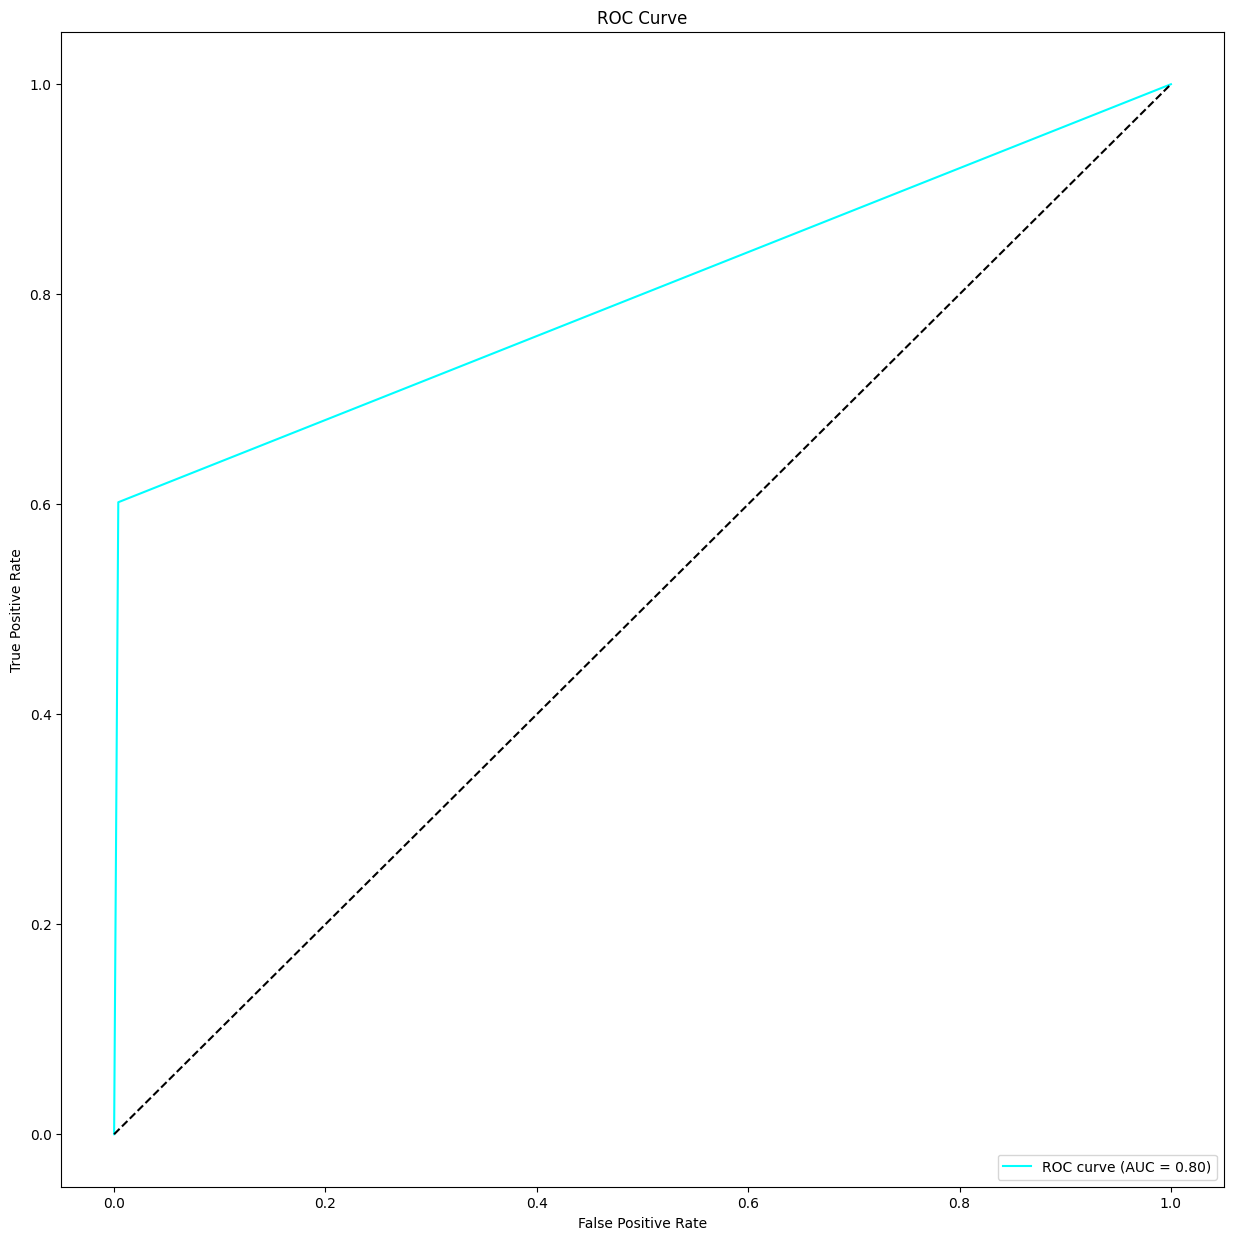

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3043
         1.0       0.91      0.60      0.73       211

    accuracy                           0.97      3254
   macro avg       0.94      0.80      0.86      3254
weighted avg       0.97      0.97      0.97      3254



In [9]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)